Любой текст.

Высокая цель: уменшить размерность векторного представления слов текстуальных данных.Построить граифики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 
5. Сколько компонент нужно оставить что бы сохранить 90% информации. 
6. Попробовать восстановить пару исходных слов. 


In [145]:
import os
import spacy
import numpy as np
from string import punctuation
from spacy.lang.en import stop_words as stop
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt


In [132]:
nlp = spacy.load("en_core_web_lg")

In [219]:
# Загружаем отрывок текста из файла text.txt

file = open('book.txt', 'r')
text = file.read()
doc = nlp(text)

In [220]:
stop_words = stop.STOP_WORDS
# Создание списка предложений с фильтрацией
sentences = [
    " ".join(
        word.lemma_.lower()  # Лемматизация и приведение к нижнему регистру
        for word in sentence
        if word.text.isalpha()  # Фильтрация цифр и смешанных символов
        and word.lower_ not in punctuation  # Исключение пунктуации
        and word.lower_ not in stop_words  # Исключение стоп-слов
        and word.pos_ not in ('SPACE', 'SYM', 'X')  # Исключение других символов
    )
    for sentence in doc.sents
]



Для оценки результатов работы метода PCA будем использовать объясненную долю дисперсии - метрику, показывающая, какую часть общей дисперсии данных объясняет каждая главная компонента.
Векторизацию выполням с помощью CountVectorizer - метода, основанного на подсчете количества раз, когда слова появляется в тексте. 

Количество компонент для сохранения 90% информации: 192


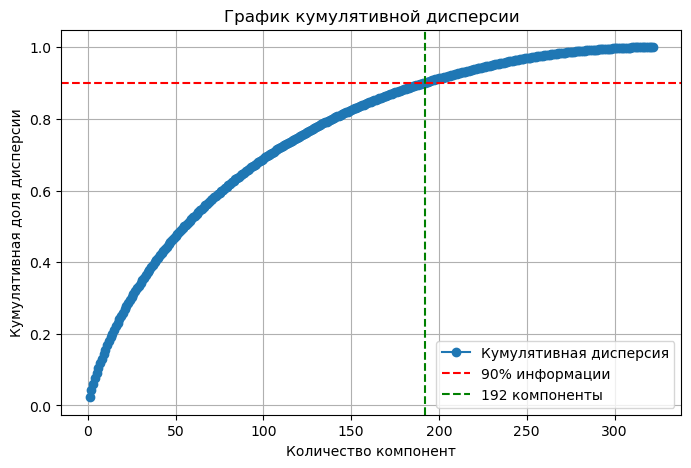

In [194]:

# Векторизация текста с помощью CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(sentences).toarray()

# Применение PCA для уменьшения размерности
pca = PCA()
X_pca = pca.fit_transform(X)

# Объясненная доля дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


# Выбор количества компонент для сохранения 90% информации
n_components = (cumulative_variance >= 0.9).argmax() + 1
print(f"Количество компонент для сохранения 90% информации: {n_components}")

# Визуализация объясненной дисперсии
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label="Кумулятивная дисперсия")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% информации")
plt.axvline(x=n_components, color='g', linestyle='--', label=f"{n_components} компоненты")
plt.xlabel("Количество компонент")
plt.ylabel("Кумулятивная доля дисперсии")
plt.title("График кумулятивной дисперсии")
plt.legend()
plt.grid()
plt.show()


# Уменьшение размерности до рассчитанного числа компонент
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)



Таким образом, при использовании CountVectorizer для сохранения 90% информации необходимо 192 главные компоненты.

Также выполним векторизацию с помощью TF-IDF - метода, учитывающего помимо частоты появления слова также его редкость, а значит - смысловую значимость.

Количество компонент для сохранения 90% информации: 242


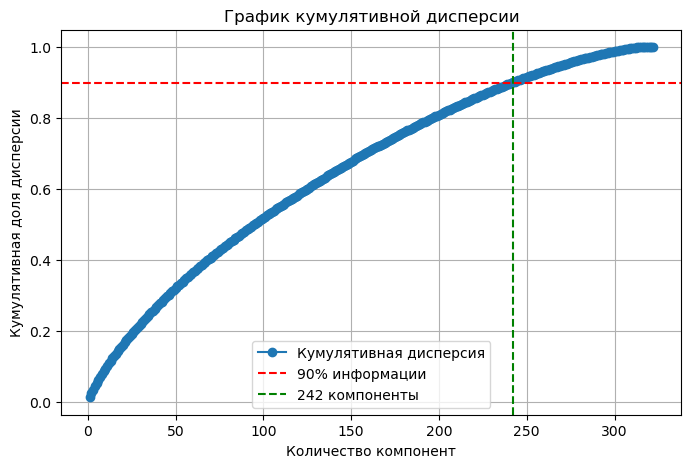

In [192]:

# Векторизация текста с помощью TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(sentences).toarray()

# Применение PCA для уменьшения размерности
pca = PCA()
X_pca = pca.fit_transform(X_tfidf)

# Объясненная доля дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Выбор количества компонент для сохранения 90% информации
n_components_tfidf = (cumulative_variance_ratio >= 0.9).argmax() + 1
print(f"Количество компонент для сохранения 90% информации: {n_components_tfidf}")

# Визуализация объясненной дисперсии
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', label="Кумулятивная дисперсия")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% информации")
plt.axvline(x=n_components_tfidf, color='g', linestyle='--', label=f"{n_components_tfidf} компоненты")
plt.xlabel("Количество компонент")
plt.ylabel("Кумулятивная доля дисперсии")
plt.title("График кумулятивной дисперсии")
plt.legend()
plt.grid()
plt.show()



# Уменьшение размерности до рассчитанного числа компонент
pca = PCA(n_components=n_components_tfidf)
X_reduced = pca.fit_transform(X)




Таким образом, при использовании TfidfVectorizer для сохранения 90% информации необходимо 242 главные компоненты.

В ходе работы выполнена фильтрация текста и последующая его векторизация двумя методами - CountVectorizer и TfidfVectorizer.
Также уменьшена размерность данных с помощью РСА. 
Оценен результат работы РСА с помощью метрики объясненной дисперсии.
Для сохранения 90% информации при использовании CountVectorizer необходимо 192 главные компоненты, при использовании TfidfVectorizer необходимо 242 главные компоненты.
